# Load Data

In [193]:
import pandas as pd
import json
import numpy as np

In [194]:
file = 'C:/Study/DS501/Capstone/data.json'
file_data = open(file,errors='ignore',encoding = 'gb18030')
line = file_data.readlines()

In [195]:
from pandas.io.json import json_normalize
list = []
for i in line[1:52708]:
    list.append(json.loads(i))
for i in line[52710:56100]:
    list.append(json.loads(i))
for i in line[56120:70000]:
    list.append(json.loads(i))
x = json_normalize(list)
df = pd.DataFrame(x)

In [196]:
pd.set_option('display.max_columns', 500)
df.head(5)

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,properties.$first_referrer,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,properties.$os,properties.$os_version,properties.$referrer,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,properties.contact,properties.email,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type
0,3040562711955,9939d3e087bca29c42334d96dccd25ca0e06652a,NaN,NaN,js,code,1.6.20,NaN,NaN,zh-CN,,,2017-03-06 17:04:10.999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490958296645,profile_set_once
1,9587552771961,9939d3e087bca29c42334d96dccd25ca0e06652a,$pageview,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaN,111.204.198.242,True,True,,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,pc,windows,10,,,768.0,1366.0,绁炵瓥鏁版嵁 | Sensors Data - 鍥藉唴棰嗗厛鐨勭敤鎴疯涓哄垎鏋愪骇鍝,https://sensorsdata.cn/?ch=demo,/,NaN,NaN,NaN,NaN,NaN,demo,NaN,,NaN,,demo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,1488791050856,track
2,0652937076129,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaN,111.204.198.242,True,False,,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,pc,windows,10,NaN,NaN,768.0,1366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demo,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,request,index,NaN,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,2,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,1488791051772,track
3,8207407748558,9939d3e087bca29c42334d96dccd25ca0e06652a,btnClick,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaN,111.204.198.242,True,False,,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,pc,windows,10,NaN,NaN,768.0,1366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demo,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,request,index,NaN,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,2,NaN,https://sensorsdata.cn/?ch=demo,NaN,NaN,NaN,NaN,1488791056032,track
4,4967393021929,595466e9a8e733434ce08de16e927d985e0b5d48,demo_leave,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaN,219.135.131.99,True,False,https://www.baidu.com/baidu.php,www.baidu.com,閫氱敤璇,閫氱敤-鐢ㄦ埛鐢诲儚,cpc,baidu,鐢ㄦ埛鐢诲儚,js,1.6.20,pc,windows,6.1,NaN,NaN,800.0,1280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.baidu.com/baidu.php,NaN,www.baidu.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,21.291,https://www.sensorsdata.cn/demo.html,NaN,NaN,NaN,NaN,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,NaN,NaN,NaN,1488791057880,track


In [197]:
# check basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69977 entries, 0 to 69976
Data columns (total 70 columns):
_nocache                               69977 non-null object
distinct_id                            69977 non-null object
event                                  61278 non-null object
jssdk_error                            42 non-null object
lib.$lib                               69977 non-null object
lib.$lib_method                        69977 non-null object
lib.$lib_version                       69977 non-null object
properties.$browser                    61278 non-null object
properties.$browser_version            61278 non-null object
properties.$first_browser_language     8442 non-null object
properties.$first_referrer             8653 non-null object
properties.$first_referrer_host        8653 non-null object
properties.$first_visit_time           8699 non-null object
properties.$ip                         61278 non-null object
properties.$is_first_day               61278

# Data Exploration

In [198]:
import matplotlib.pyplot as plt

% matplotlib inline
import seaborn as sns

In [199]:
# check what type of model has been used to access sensor website
df['properties.$model'].unique()

array([nan, 'pc', 'mac', 'meizu', 'iphone', 'vivo', 'na', 'huawei',
       'lenovo', 'samsung', 'hongmi', 'android', 'mi', 'zte', 'nexus',
       'ipad', 'coolpad', 'oppo', 'htc', 'lg'], dtype=object)

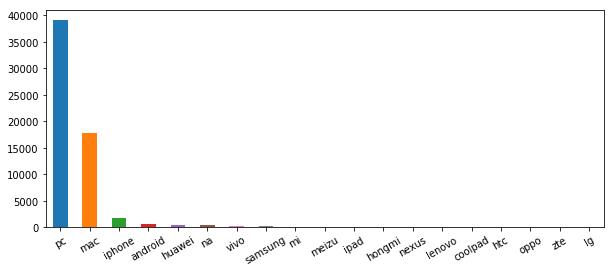

In [200]:
# plot models used to visit website
model  = df['properties.$model'].value_counts(sort = True)
model.plot(kind = 'bar',rot=30, figsize = [10,4])

In [201]:
# Check what type of event that people conduct on website
df['event'].unique()

array([nan, '$pageview', 'btnClick', 'demo_leave', 'index_leave',
       'click_send_cellphone', 'verify_cellphone_code', 'clickSubmit',
       'about_leave', 'courses_leave', 'formSubmit', 'page_close',
       'courses_play_leave'], dtype=object)

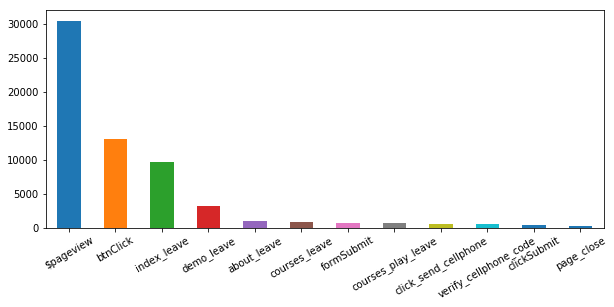

In [202]:
# plot events
event  = df['event'].value_counts(sort = True)
event.plot(kind = 'bar',rot=30, figsize = [10,4])

In [203]:
# Check what kinds of browswer people use to visit website
df['properties.$browser'].unique()

array([nan, 'chrome', 'firefox', 'micromessenger', 'safari', 'liebao',
       'edge', 'qq', 'ie', 'sogou', 'uc', 'webview', 'opera', 'maxthon',
       'na', 'baidu', 'mi', 'android', 'theworld', '360', 'tt', 'yandex',
       'coolnovo', 'ali-ap'], dtype=object)

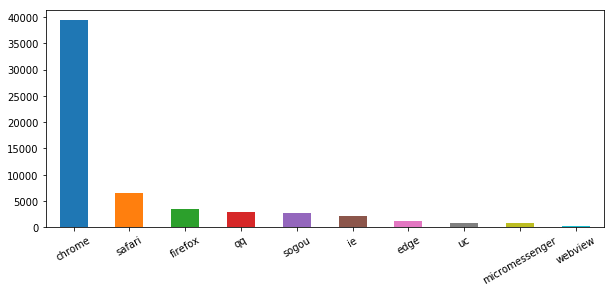

In [204]:
# plot the top ten popular browser
browser  = df['properties.$browser'].value_counts(sort = True)[:10]
browser.plot(kind = 'bar',rot=30, figsize = [10,4])

In [205]:
# top 10 popular referrer site
df['properties.$latest_referrer'] = df['properties.$latest_referrer'].replace(r'^\s*$', np.nan, regex=True)
df['properties.$latest_referrer'].value_counts(sort = True)[:10]

https://www.baidu.com/baidu.php                                                   19942
https://www.baidu.com/link                                                         4820
https://www.baidu.com/s                                                            1483
https://www.google.com.hk/                                                          799
https://www.google.com/                                                             643
http://36kr.com/                                                                    582
https://www.google.co.jp/                                                           257
http://www.itjuzi.com/company/16088                                                 109
https://link.zhihu.com/?target=https%3A//sensorsdata.cn/manual/data_model.html       85
https://link.zhihu.com/?target=https%3A//sensorsdata.cn/                             83
Name: properties.$latest_referrer, dtype: int64

In [206]:
from datetime import datetime
df['time'] = pd.to_datetime(df['time']/1000.,unit='s')

In [207]:
import datetime
df['properties.$first_visit_time'] = pd.to_datetime(df['properties.$first_visit_time'])

In [208]:
# Get the exact number of unique user, which is 10935
len(df['distinct_id'].unique())

10935

# Conversion Rate

Define conversion event as a successful form submission for free trial sumbited by distinct user. And total number of user as total distinct user that visited sensor website.

In [209]:
# filter rows that have triggered event formSubmit
submit = df[df['event'] == 'formSubmit']

In [210]:
submit.head()

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,properties.$first_referrer,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,properties.$os,properties.$os_version,properties.$referrer,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,properties.contact,properties.email,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type
272,0696344326377,05275c9a86246309de06ef9e9443dbecb2d9e432,formSubmit,NaN,js,code,1.6.20,ie,8,NaN,NaN,NaN,NaT,116.231.5.148,True,False,http://www.baidu.com/baidu.php?sc.7aTK000CsN4T...,www.baidu.com,閫氱敤璇,閫氱敤-鐢ㄦ埛鐢诲儚,cpc,baidu,鐢ㄦ埛鐢诲儚,js,1.6.20,pc,windows,6.1,NaN,NaN,900.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.baidu.com/baidu.php?sc.7aTK000CsN4T...,NaN,www.baidu.com,NaN,缇***,158********,j***********************,baidu,NaN,False,True,閲**,NaN,NaN,NaN,NaN,NaN,www.baidu.com,http://www.baidu.com/baidu.php?sc.7aTK000CsN4T...,10,NaN,https://www.sensorsdata.cn/?utm_source=baidu&u...,https://www.sensorsdata.cn,https://www.sensorsdata.cn/?utm_source=baidu&u...,NaN,4981,2017-03-06 09:19:15.163,track
361,3890873001837,9784a50f2468b6e08fd55325bb3c7c614608dd13,formSubmit,NaN,js,code,1.6.20,qq,9.5,NaN,NaN,NaN,NaT,106.38.97.146,True,False,NaN,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,pc,windows,6.1,NaN,NaN,900.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,,135********,,NaN,NaN,NaN,False,M******,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,https://www.sensorsdata.cn/index.html,NaN,NaN,NaN,7772,2017-03-06 09:23:59.314,track
373,4012834902778,9784a50f2468b6e08fd55325bb3c7c614608dd13,formSubmit,NaN,js,code,1.6.20,qq,9.5,NaN,NaN,NaN,NaT,106.38.97.146,True,False,NaN,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,pc,windows,6.1,NaN,NaN,900.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,y****,135********,y***************,,NaN,True,True,M******,NaN,NaN,NaN,NaN,NaN,,,2,NaN,https://www.sensorsdata.cn/index.html,https://www.sensorsdata.cn,https://www.sensorsdata.cn/index.html,NaN,7772,2017-03-06 09:24:31.995,track
434,4328762355838,caea8b0b0460b224556a0d197e030de5164e4c81,formSubmit,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaT,111.202.103.202,True,False,NaN,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,mac,macosx,10.11,NaN,NaN,900.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demo,NaN,https://www.google.com.ph/,NaN,www.google.com.ph,NaN,,136********,,NaN,NaN,NaN,False,w*********,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,https://www.sensorsdata.cn/,NaN,NaN,NaN,1815,2017-03-06 09:28:14.233,track
438,4378529818325,caea8b0b0460b224556a0d197e030de5164e4c81,formSubmit,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaT,111.202.103.202,True,False,NaN,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,mac,macosx,10.11,NaN,NaN,900.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demo,NaN,https://www.google.com.ph/,NaN,www.google.com.ph,NaN,涓*,136********,1*************,demo,NaN,True,True,w*********,NaN,NaN,NaN,NaN,NaN,,,4,NaN

In [211]:
# check how many user has submitted free trial form
len(submit)

713

In [212]:
# define total number of user as total distinct user that visited sensor website.
total_visit = len(df['distinct_id'].unique())

In [213]:
# filter rows for successed submission 
submit_suc = submit[submit['properties.isSuccess'] == True]

In [214]:
# check whether there is multiple submission for one company
submit_suc.groupby('properties.company').filter(lambda x : x['properties.company'].shape[0]>=2)

,_nocache,distinct_id,event,jssdk_error,lib.$lib,lib.$lib_method,lib.$lib_version,properties.$browser,properties.$browser_version,properties.$first_browser_language,properties.$first_referrer,properties.$first_referrer_host,properties.$first_visit_time,properties.$ip,properties.$is_first_day,properties.$is_first_time,properties.$latest_referrer,properties.$latest_referrer_host,properties.$latest_utm_campaign,properties.$latest_utm_content,properties.$latest_utm_medium,properties.$latest_utm_source,properties.$latest_utm_term,properties.$lib,properties.$lib_version,properties.$model,properties.$os,properties.$os_version,properties.$referrer,properties.$referrer_host,properties.$screen_height,properties.$screen_width,properties.$title,properties.$url,properties.$url_path,properties.$utm_campaign,properties.$utm_content,properties.$utm_medium,properties.$utm_source,properties.$utm_term,properties._latest_ch,properties._session_from_url,properties._session_referrer,properties._session_referrer_domain,properties._session_referrer_host,properties.ch,properties.company,properties.contact,properties.email,properties.from_url,properties.info,properties.isMsg,properties.isSuccess,properties.name,properties.page,properties.pagePosition,properties.pageStayTime,properties.pageUrl,properties.project_name,properties.referrHostUrl,properties.referrerUrl,properties.requestBtn,properties.result,properties.session_page_url,properties.siteUrl,properties.site_url,properties.url_path,properties.verification_code,time,type
373,4012834902778,9784a50f2468b6e08fd55325bb3c7c614608dd13,formSubmit,NaN,js,code,1.6.20,qq,9.5,NaN,NaN,NaN,NaT,106.38.97.146,True,False,NaN,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,pc,windows,6.1,NaN,NaN,900.0,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,y****,135********,y***************,,NaN,True,True,M******,NaN,NaN,NaN,NaN,NaN,,,2,NaN,https://www.sensorsdata.cn/index.html,https://www.sensorsdata.cn,https://www.sensorsdata.cn/index.html,NaN,7772,2017-03-06 09:24:31.995,track
438,4378529818325,caea8b0b0460b224556a0d197e030de5164e4c81,formSubmit,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaT,111.202.103.202,True,False,NaN,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,mac,macosx,10.11,NaN,NaN,900.0,1440.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demo,NaN,https://www.google.com.ph/,NaN,www.google.com.ph,NaN,涓*,136********,1*************,demo,NaN,True,True,w*********,NaN,NaN,NaN,NaN,NaN,,,4,NaN,https://www.sensorsdata.cn/,https://www.sensorsdata.cn,https://www.sensorsdata.cn/,NaN,1815,2017-03-06 09:28:20.999,track
1233,6156884003408,36256c76d37a3225a9f8b0bd696a7b1537ab9306,formSubmit,NaN,js,code,1.6.20,sogou,2,NaN,NaN,NaN,NaT,113.97.184.46,True,False,http://www.sogou.com/bill_cpc?v=1&p=WJhqUtHr91...,www.sogou.com,S-閫氱敤璇,閫氱敤-澶ф暟鎹-鍏朵粬,mcpc,sogou,澶ф暟鎹簲鐢,js,1.6.20,pc,windows,10,NaN,NaN,720.0,1280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.sogou.com/bill_cpc?v=1&p=WJhqUtHr91...,NaN,www.sogou.com,NaN,灏***,186********,c*********************,sogou,NaN,True,True,鏇*,NaN,NaN,NaN,NaN,NaN,www.sogou.com,http://www.sogou.com/bill_cpc?v=1&p=WJhqUtHr91...,3,NaN,https://www.sensorsdata.cn/?utm_source=sogou&u...,https://www.sensorsdata.cn,https://www.sensorsdata.cn/?utm_source=sogou&u...,NaN,1881,2017-03-06 10:28:52.167,track
1537,8488474759962,2034fcbba27bf9a2b320b598308beaac0adaed48,formSubmit,NaN,js,code,1.6.20,chrome,50,NaN,NaN,NaN,NaT,121.226.102.99,True,False,NaN,,NaN,NaN,NaN,NaN,NaN,js,1.6.20,pc,windows,10,NaN,NaN,768.0,1366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,NaN,缁*,136********,2****************,,NaN,True,True,姹**,NaN,NaN,NaN,NaN,NaN,,,1,NaN,https://www.sensorsdata.cn/,https://www.sensorsdata.cn,https://www.sensorsdata.cn/,NaN,8573,2017-03-06 10:48:38.636,track
1608,4017951486553,a030bda4cbdacab11e09f826c5dcca76d6f1ee60,formSubmit,NaN,js,code,1.6.20,chrome,56,NaN,NaN,NaN,NaT,113.87.189.104,True,False,NaN,,閫氱敤璇,閫氱敤-鏁版嵁鍙鍖,cpc,baidu,鏁版嵁鍙鍖栧伐鍏,js,1.6.20,pc,windows,10,NaN,NaN,768.0,1366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,demo,NaN,https://www.baid

In [215]:
# define converted user as distinct user that successfully submited a free trial form
converted= len(submit_suc['distinct_id'].unique())

In [216]:
# calculate conversion rate
conversion_rate = converted/total_visit
print("Conversion rate: {:.2%}".format(conversion_rate))

Conversion rate: 3.86%


## Comparison between converted user and unconverted user

In [217]:
# get full data for converted user
con_move = df[df.distinct_id.isin(submit_suc.distinct_id)]

In [218]:
visit_con = con_move.pivot_table(columns = 'event', values = '_nocache', aggfunc = 'count')
visit_con

event,$pageview,about_leave,btnClick,clickSubmit,click_send_cellphone,courses_leave,courses_play_leave,demo_leave,formSubmit,index_leave,page_close,verify_cellphone_code
_nocache,3831,92,2687,447,500,75,72,1405,648,874,5,490


In [219]:
uncon_move = df[~df['distinct_id'].isin(submit_suc['distinct_id'])]

In [220]:
visit_uncon = uncon_move.pivot_table(columns = 'event', values = '_nocache', aggfunc = 'count')
visit_uncon

event,$pageview,about_leave,btnClick,clickSubmit,click_send_cellphone,courses_leave,courses_play_leave,demo_leave,formSubmit,index_leave,page_close,verify_cellphone_code
_nocache,26598,858,10303,28,53,773,628,1759,65,8859,206,22


The two table above shows the different types of event between converted user and unconverted user. Since there are more unconverted user than converted user, idealy there unconverted user should have generate more event than converted user. However, we can tell converted user created more event on click_send_cellphone, clickSubmit, formSubmit and verify_cellphone_code. And there are 65 converted user have submited form for free trial, but they didn't successed. Sensor should modify they way they receive free trial submission.

In [221]:
# average event triggered by not converted user
uncon = df[~df['distinct_id'].isin(submit_suc['distinct_id'])]
uncon.groupby('distinct_id').size().describe()

count    10513.000000
mean         5.564539
std          9.000711
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max        254.000000
dtype: float64

In [222]:
# average event triggered by converted user
con = df[df['distinct_id'].isin(submit_suc['distinct_id'])]
con.groupby('distinct_id').size().describe()

count    422.000000
mean      27.196682
std       19.146062
min        7.000000
25%       15.000000
50%       22.000000
75%       33.000000
max      168.000000
dtype: float64

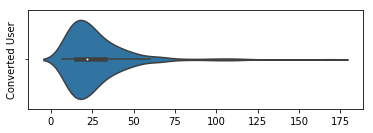

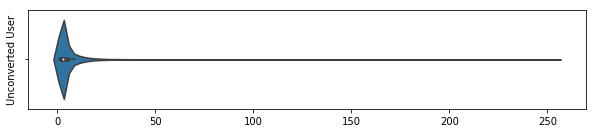

In [223]:
# plot
plt.subplot(2, 1, 1)
sns.violinplot(con.groupby('distinct_id').size())
plt.ylabel('Converted User')
plt.figure(figsize=(10, 4))
plt.subplot(2, 1, 2)
sns.violinplot(uncon.groupby('distinct_id').size())
plt.ylabel('Unconverted User')
plt.figure(figsize=(10, 4))
plt.tight_layout()

We can tell that converted user have visited sensor website more and have higher range than unconverted user. Majority of the converted user visited website for 27 times and unconverted user visited website for 6 times, which coincide with our expectation. Especially for unconverted user, 75% fo the them visited less than 5 times to sensor website, and this indicates they show less interest on the website. Overall, users that shows more interest in sensor websit are more likely to apply for a free trial. 

In [224]:
len(uncon[(uncon['properties.$is_first_day'] == True) & ~(uncon['properties.$is_first_time'] == True) ])/len(uncon['distinct_id'].unique())

2.285265861314563

In [225]:
len(con[(con['properties.$is_first_day'] == True) & ~(con['properties.$is_first_time'] == True) ])/len(con['distinct_id'].unique())

18.104265402843602

Then i also calculated the average events(exclude their first event) that a user made on their first day. On average, converted user make 18 event on their first day, while unconverted user make only 2 event. It seems like converted user have visited a lot more times on their first day than unconverted user does, which indicates converted user show more interest in the beginging. They probably heard sensor services from someone in the industry, or they are find better solutions for digital marketing and they have been actively seeking solutions.

After i find the differences between converted user and unconverted user, i can't help to notice that there are some unconverted user that have been visited many times. And itried to figure our why they have shown great interest in sensor data product, but wouldn't been able to sumbit for free trail.

In [226]:
# create pivot table to get the number of event that a user triggered
uncon_high = uncon_move.pivot_table(index = 'distinct_id', values = 'event', aggfunc = 'count')

In [227]:
# define unconverted high visit user as a uncoverted user have been visited more than 22 times, 
# which is the average visit time for converted user
uncon_high = uncon_high[uncon_high['event']>22].index.tolist()

In [228]:
# get all data for unconverted high visist user
uncon_high_visit = uncon_move[uncon_move['distinct_id'].isin(uncon_high)]

In [229]:
# average time gap between actions of unconverted high visit user
uncon_high_visit.groupby('distinct_id')['time'].diff().mean()

Timedelta('-1 days +20:08:07.105173')

In [230]:
# top 5 urls that UHV user visited
uncon_high_visit['properties.$url'].value_counts(sort = True)[:5]

https://www.sensorsdata.cn/demo.html       545
https://www.sensorsdata.cn/                535
https://www.sensorsdata.cn/manual/         503
https://www.sensorsdata.cn/product.html    386
https://www.sensorsdata.cn/b-round.html    311
Name: properties.$url, dtype: int64

In [231]:
# average time gap between actions of converted user
con_move.groupby('distinct_id')['time'].diff().mean()

Timedelta('-1 days +09:57:18.216095')

In [232]:
# top 5 urls that converted user visited
con_move['properties.$url'].value_counts(sort = True)[:5]

https://www.sensorsdata.cn/demo.html       1201
https://sensorsdata.cn/demo.html            421
https://www.sensorsdata.cn/product.html     190
https://sensorsdata.cn/?ch=demo             175
https://www.sensorsdata.cn/                 175
Name: properties.$url, dtype: int64

The time gap is quite similar between UHV(unconverted high visit) user and converted user, which means those UHV users are not hesiteting about submit for free trail. They are viewing around the same frequency as converted user did, then what makes them kept visiting sensor website? I think it might have something to do with the user. For converted user, the top 5 usrls they visited are all about product and demo. However, UHV users visited more on manual, product and their b round news.So these peopel could be investors that interested in sensor data, they are learning about sensor's product adn evaluating this company. Or a traditional company that are trying to expand into digital marketing, they are not familar with the system, and that's why they have been read manual page for many times.

In [233]:
# top 5 referrer link for high visit but haven't been converted user
uncon_high_visit['properties.$latest_referrer'].value_counts(sort = True)[:5]

https://www.baidu.com/baidu.php    2005
https://www.baidu.com/link         1467
https://www.google.com.hk/          240
https://www.baidu.com/s             131
https://www.google.com/             115
Name: properties.$latest_referrer, dtype: int64

In [234]:
# top 5 referrer link for unconverted user
uncon['properties.$latest_referrer'].value_counts(sort = True)[:5]

https://www.baidu.com/baidu.php    16146
https://www.baidu.com/link          3891
https://www.baidu.com/s             1235
https://www.google.com.hk/           705
https://www.google.com/              610
Name: properties.$latest_referrer, dtype: int64

In [235]:
# top 5 referrer link for converted user
con['properties.$latest_referrer'].value_counts(sort = True)[:5]

https://www.baidu.com/baidu.php                                                                                                                                                                             3796
https://www.baidu.com/link                                                                                                                                                                                   929
https://www.baidu.com/s                                                                                                                                                                                      248
https://www.google.com.hk/                                                                                                                                                                                    94
http://www.baidu.com/baidu.php?sc.IBTK00jyNUHxgmbNsRNO9pwmCW85unoZ3RhY2LA2yYSIy_P_a2rpHF5Zfm3aK0gihACpb2uofjfdgZRsOOEuvUOyAkfOXqqepIc29omYi45Xz8W9GLtwRV3z95qkf9L8sU

By comparing the top 5 referrer links, we can tell the top 4 website are the same for three different client groups. But for converted user, the last website is a link form Baidu, which could be ad link. If it is a ad link, then we can say, this kind of advertisment did a sepecific good job, adn sensor should put more resources in that kind of advertising.